# Insper
# Informação Georreferenciada
# Exercício - Análise de Pontos


O conhecido mapa da cólera de John Snow é frequentemente citado como um dos primeiros exemplos do uso da pesquisa geográfica e análise espacial para entender uma epidemia. Começando em 31 de agosto de 1854, um surto de cólera atingiu o distrito de Londres chamado *Soho*. Ao longo de três dias, 127 pessoas morreram da doença e, em 10 de setembro, mais de 500 haviam morrido. Esta investigação usou técnicas de análise que hoje provavelmente envolveriam o uso de Sistemas de Informações Geográficas (SIGs). A análise de Snow demonstra o poder dos mapas e das informações subjacentes para visualizar e resolver problemas complicados.


A cólera se espalhou para as Ilhas Britânicas no início da década de 1830 devido à falta de saneamento e equívocos sobre suas causas. Hoje sabemos que a doença é causada por uma bactéria e geralmente é transmitida através de água potável contaminada. **O médico conseguiu, através da conversa com os moradores locais e sua análise espacial das mortes por cólera, determinar que sua suspeita sobre a origem da doença era realmente verdadeira, uma bomba de água na Broad Street**. Snow mapeou os locais dos poços de água locais e as mortes de cólera para apoiar seu argumento sobre a bomba contaminada, convencendo o conselho local a remover a alça para impedir seu uso.


O mapa de Snow, demonstrando o agrupamento espacial de mortes por cólera ao redor do poço de Broad Street, forneceu forte evidência em apoio à sua teoria de que a cólera era uma doença transmitida pela água.

Neste exercício vamos reproduzir o trabalho de John Snow. Faremos uso das principais técnicas para análises de pontos, que hoje são facilmente executadas por meio de ferramentas computacionais, mas que demonstram a vanguarda e pioneirismo de Snow.

Este código executa no **Google Colab**, mas fique à vontade para executá-lo em sua máquina.


---


## Passo 1: Instale os pacotes necessários:

In [1]:
!pip install geopandas geopy pointpats fiona pygeos


## Importe as bibliotecas necessárias



In [2]:

import numpy as np #para processamento numérico em Python
import matplotlib.pyplot as plt #para os gráficos
import os
os.environ['USE_PYGEOS'] = '0'
import geopandas as gpd #para a leitura de shapefiles
import seaborn as sns #para fazer o mapa de kernel
from matplotlib.patches import Ellipse #para projetar a elipse

# pointpats --> análise espacial de pontos
from pointpats.centrography import hull, mbr, mean_center, weighted_mean_center, manhattan_median, std_distance,euclidean_median,ellipse
from pointpats import PointPattern
import pointpats.quadrat_statistics as qs
from pointpats.distance_statistics import G, F, K, Genv, Fenv, Kenv
from pointpats import PoissonPointProcess


### Faça upload do colab dos arquivos shape (Pumps, Cholera_Deaths) e na sequência faça a leitura deles por meio do Geopandas.

In [3]:
cholera_deaths = gpd.read_file('../Data/point_analysis_snow/Cholera_Deaths.shp')
pumps = gpd.read_file('../Data/point_analysis_snow/Pumps.shp')
polygon = gpd.read_file('../Data/point_analysis_snow/polygons.shp')

In [4]:
print(cholera_deaths.crs)
print(pumps.crs)

EPSG:27700
EPSG:27700


In [5]:
cholera_deaths.head()

,Id,Count,geometry
0,0,3,POINT (529308.741 181031.352)
1,0,2,POINT (529312.164 181025.172)
2,0,1,POINT (529314.382 181020.294)
3,0,1,POINT (529317.380 181014.259)
4,0,4,POINT (529320.675 181007.872)


In [6]:
pumps.head()

,Id,geometry
0,0,POINT (529396.539 181025.063)
1,0,POINT (529192.538 181079.391)
2,0,POINT (529183.740 181193.735)
3,0,POINT (529748.911 180924.207)
4,0,POINT (529613.205 180896.804)


### Verifique os sistemas de coordenadas usados para as bombas de água e para as mortes. O que você pode dizer sobre ele, considerando que estamos nos referindo a Londres?

### Faça um gráfico com as bombas (em vermelho) e as mortes (em preto). A figura deve ter tamanho (10,8).

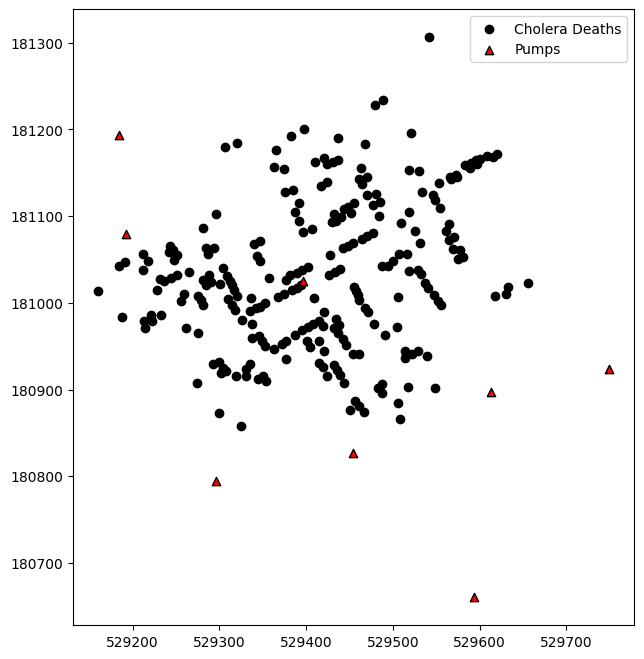

In [7]:
fig, ax = plt.subplots(figsize=(10,8))
cholera_deaths.plot(ax=ax, color='k', edgecolor='black', label='Cholera Deaths')
pumps.plot(ax=ax, color='red', edgecolor='k', marker='^', label='Pumps')
plt.legend()
plt.show()

### Extraia a longitude (x) e latitude (y) a partir da coluna geometry do shapefile Cholera_Deaths e, com uso destes dois, crie um objeto do tipo PointPattern para que possa executar as principais análises envolvendo pontos.

/home/bernardo/Documents/insper8thSem/GeoRef/geopy/lib/python3.10/site-packages/libpysal/cg/shapes.py:1492: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  warnings.warn(dep_msg, FutureWarning)
/home/bernardo/Documents/insper8thSem/GeoRef/geopy/lib/python3.10/site-packages/libpysal/cg/shapes.py:1208: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  warnings.warn(dep_msg, FutureWarning)


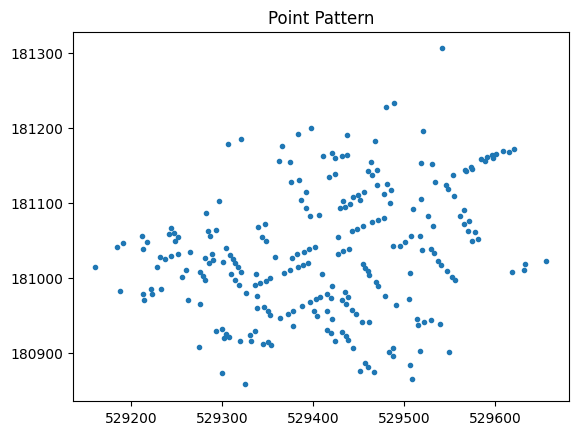

In [8]:
cholera_deaths_x = cholera_deaths.geometry.x
cholera_deaths_y = cholera_deaths.geometry.y

cholera_pontos = np.vstack([cholera_deaths_x,cholera_deaths_y]).T
cholera_pp = PointPattern(cholera_pontos)
cholera_pp.plot()

### Calcule o Centro Médio e Projete

In [9]:
cholera_mc = mean_center(cholera_pp.points)

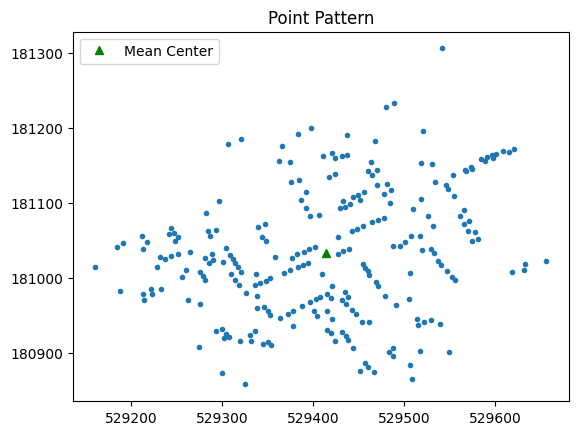

In [10]:
cholera_pp.plot()
plt.plot(cholera_mc[0], cholera_mc[1], 'g^', label='Mean Center')
plt.legend()

### Calcule a distância padrão e projete o círculo de distância padrão

In [11]:
cholera_stdd = std_distance(cholera_pp.points)

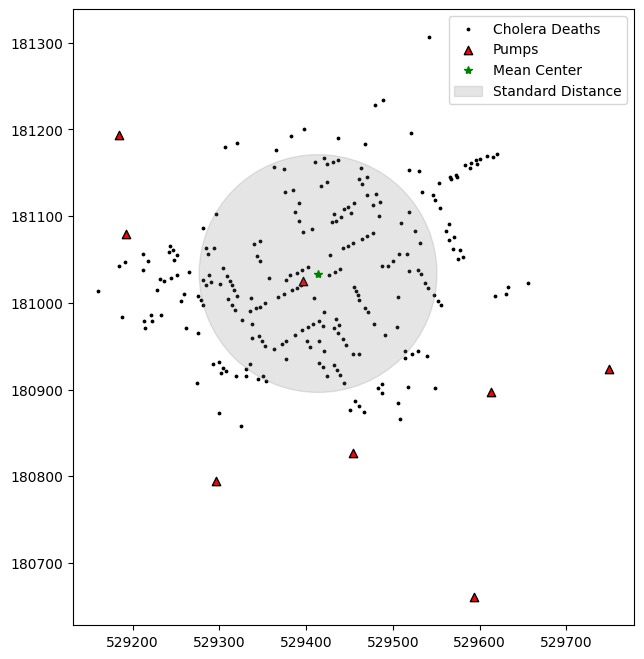

In [12]:
fig, ax = plt.subplots(figsize=(10,8))
cholera_deaths.plot(ax=ax, color='k', edgecolor='black', markersize = 3, label='Cholera Deaths')
pumps.plot(ax=ax, color='red', edgecolor='k', marker='^', label='Pumps')
plt.plot(cholera_mc[0], cholera_mc[1], 'g*', label='Mean Center')
circle = plt.Circle(cholera_mc, cholera_stdd, color='gray', alpha=0.2, label='Standard Distance')
ax.add_artist(circle)
plt.legend()
plt.show()


### Calcule e projete a elipse padrão

In [13]:
cholera_ellipse = ellipse(cholera_pp.points)

/tmp/ipykernel_4621/3233808313.py:5: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ellipse = Ellipse(cholera_mc, cholera_ellipse[0], cholera_ellipse[1], cholera_ellipse[2], color='blue', alpha=0.2, label='Ellipse')


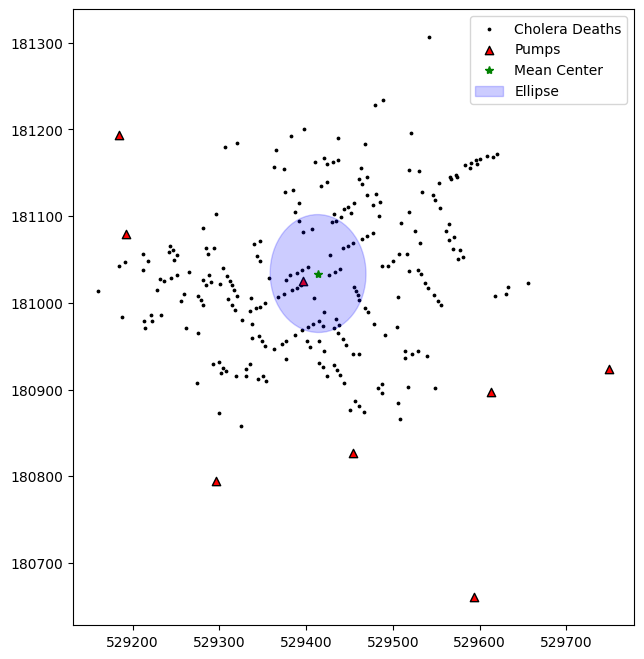

In [14]:
fig, ax = plt.subplots(figsize=(10,8))
cholera_deaths.plot(ax=ax, color='k', edgecolor='black', markersize = 3, label='Cholera Deaths')
pumps.plot(ax=ax, color='red', edgecolor='k', marker='^', label='Pumps')
plt.plot(cholera_mc[0], cholera_mc[1], 'g*', label='Mean Center')
ellipse = Ellipse(cholera_mc, cholera_ellipse[0], cholera_ellipse[1], cholera_ellipse[2], color='blue', alpha=0.2, label='Ellipse')
ax.add_artist(ellipse)
plt.legend()
plt.show()

### Calcule e projete o Quadrats retangulares, 3x3

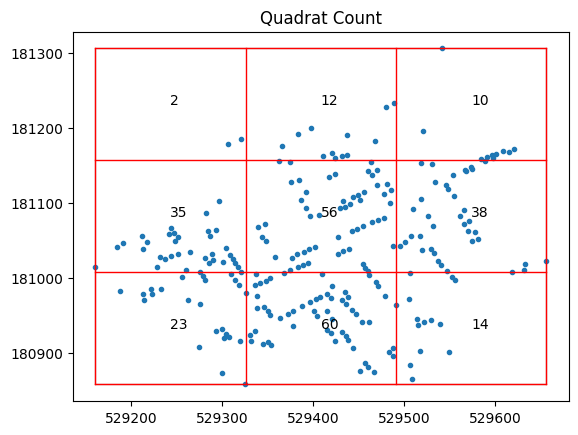

In [15]:
q_r = qs.QStatistic(cholera_pp, shape='rectangle', nx=3, ny=3)
q_r.plot()studentlife@insper.edu.br

### Densidade: Faça um mapa de kernel para estes pontos

### calcule a função K, e os envelopes de confiança com 2000 iterações (CSR)

/home/bernardo/Documents/insper8thSem/GeoRef/geopy/lib/python3.10/site-packages/libpysal/cg/shapes.py:1923: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  warnings.warn(dep_msg, FutureWarning)
/home/bernardo/Documents/insper8thSem/GeoRef/geopy/lib/python3.10/site-packages/libpysal/cg/shapes.py:103: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  warnings.warn(dep_msg, FutureWarning)
/home/bernardo/Documents/insper8thSem/GeoRef/geopy/lib/python3.10/site-packages/libpysal/cg/shapes.py:103: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  warnings.warn(dep_msg, FutureWarning)


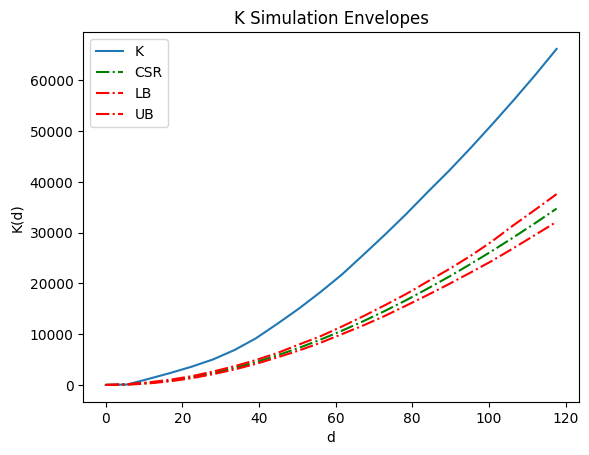

In [18]:
sim = PoissonPointProcess(cholera_pp.window, cholera_pp.n, 2000, asPP=True)

realizations = PoissonPointProcess(cholera_pp.window, cholera_pp.n, 250, asPP = True)

kenv = Kenv(cholera_pp, intervals=20, realizations=realizations)
kenv.plot()

Achei que pelo grafico de K distance function e K simulation envelopes pode-se perceber que existe um cluster no mapa, já que a linha K está acima das linhas CSR, LB e UB, denotando que a distribuição das mortes devido a cólera não foram distribuídas de maneira randômica geográficamente. E usando as ferramentas do mapa de Kernel, mapa de Quadrats, elipse e distância padrão do centro geográfico das mortes podemos ver que existe uma correlação que todos indicam que a maioria das mortes ocorreram próximas da bomba de àgua central, indicando que o clustering se encontra próximo dela, implicando que a origem da maioria dos casos de cólera é a bomba contaminada.